In [1]:
import warnings
import numpy as np
from numpy import argmax
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Embedding
from keras.layers import Activation, Dropout, Flatten, Dense, LSTM, BatchNormalization
from scipy.misc import imsave
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle
import PIL
warnings.filterwarnings('ignore')
%pylab inline



Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
fd = open('asphalt/1545669611.1566238', 'rb')
dataset = pickle.load(fd)

def data(dataset):
    i=0
    for k in dataset:
        i=i+1
        print(k)
        if(i>20):
            break

def displayData(k):
    print('Time {}, Shape : {}, Key : {}, Type {}'.format(k,dataset[k]['data'].shape,dataset[k]['key'],dataset[k]['type']))
    return PIL.Image.fromarray(dataset[k]['data'])

data(dataset)

1545664215.3010664
1545664215.4150603
1545664215.918066
1545664215.9996667
1545664220.3332438
1545664220.4462438
1545664220.482244
1545664220.581247
1545664223.4771285
1545664224.5981386
1545664224.7621388
1545664224.8781831
1545664225.1122603
1545664225.1652613
1545664225.2772617
1545664225.3512614
1545664230.2693489
1545664230.389348
1545664233.021304
1545664235.6943738
1545664237.2794883


Time 1545664215.3010664, Shape : (245, 480), Key : space, Type down


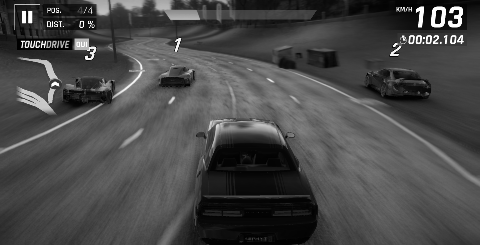

In [3]:
displayData(1545664215.3010664)

In [4]:
#CONFIG
size_len=245*480


In [5]:
#print(dataset[1545566870.1522963]['data'].shape)
first_val = list(dataset.values())[0]['data']
n_pixels = np.prod(first_val.shape[1:])
print(n_pixels,len(first_val))

#Flatten array
#X_train = np.array([dataset[v]['data'].reshape( (1,size_len)) for v in dataset])
X_train = np.array([dataset[v]['data'] for v in dataset])
print(X_train[:1])

X_train = X_train.astype('float32') / 255.
print(X_train[:5])

for i in X_train:
    print(i[0])
    break

#X_train = np.array([ v[0] for v in X_train ])
X_data = np.array([ v[0] for v in X_train ])

print(X_train.shape)
print(X_train[:5])

480 245
[[[18 20 20 ... 14 14 14]
  [23 21 23 ...  9  9  9]
  [25 20 23 ...  8  8  8]
  ...
  [47 49 49 ... 58 57 57]
  [48 48 49 ... 57 57 56]
  [48 48 50 ... 56 57 56]]]
[[[0.07058824 0.07843138 0.07843138 ... 0.05490196 0.05490196 0.05490196]
  [0.09019608 0.08235294 0.09019608 ... 0.03529412 0.03529412 0.03529412]
  [0.09803922 0.07843138 0.09019608 ... 0.03137255 0.03137255 0.03137255]
  ...
  [0.18431373 0.19215687 0.19215687 ... 0.22745098 0.22352941 0.22352941]
  [0.1882353  0.1882353  0.19215687 ... 0.22352941 0.22352941 0.21960784]
  [0.1882353  0.1882353  0.19607843 ... 0.21960784 0.22352941 0.21960784]]

 [[0.06666667 0.1254902  0.10980392 ... 0.02745098 0.03137255 0.03137255]
  [0.05098039 0.12156863 0.11764706 ... 0.04313726 0.04705882 0.04705882]
  [0.07058824 0.10588235 0.12156863 ... 0.05098039 0.04705882 0.04705882]
  ...
  [0.1764706  0.1764706  0.1764706  ... 0.22745098 0.22745098 0.23529412]
  [0.16862746 0.16470589 0.16862746 ... 0.23921569 0.22745098 0.22745098]


In [6]:
def cattoint(val):
    if val =='space_down':
        return 1
    if val =='s_down':
        return 2
    if val =='a_down':
        return 3
    if val =='d_down':
        return 4
    if val =='space_up':
        return 5
    if val =='s_up':
        return 6
    if val =='a_up':
        return 7
    if val =='d_up':
        return 8
    return 0

Y_train = np.array([ cattoint(dataset[v]['key']+'_'+dataset[v]['type']) for v in dataset])
print(Y_train)
Y_train=to_categorical(Y_train)
print(Y_train[:20])

[1 5 1 ... 1 5 0]
[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [7]:
print(X_train.shape)
print(Y_train.shape)

nb_cat=len(Y_train[0])
print(nb_cat)

(3090, 245, 480)
(3090, 9)
9


In [16]:
#Nos AI

def ModelConv(dropout=None):
    model = Sequential()
    model.add(Conv1D(filters=40,kernel_size=25,input_shape=X_train.shape[1:],activation='relu',strides=1))
    model.add(MaxPooling1D(pool_size = (20), strides=(10)))

    if dropout == 'Drop':
        model.add(Dropout(0.25))
    if dropout == 'Norm':
        model.add(BatchNormalization())
    model.add(Conv1D(filters=20,kernel_size=15,activation='relu',strides=1))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(nb_cat, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

def ModelDense(): 
    model = Sequential()
    #model.add(Embedding(input_dim=size_len,output_dim=size_len))
    model.add(Dense(100,input_shape=X_data.shape[1:], activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(75))
    model.add(Dropout(0.25))
    model.add(Dense(50))
    model.add(Dropout(0.25))
    model.add(Dense(25))
    model.add(Dense(nb_cat, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

def ModelLSTM():
    model = Sequential()
    #model.add(Conv1D(filters=40,kernel_size=25,input_shape=X_train.shape[1:],activation='relu',strides=1))
    #model.add(MaxPooling1D(pool_size = (20), strides=(10)))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.20))
    model.add(LSTM(25, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(nb_cat, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [17]:
# apprentissage
model = ModelLSTM()
model.fit(X_train, Y_train, epochs=50, verbose=1)

Epoch 1/50
3090/3090 [==============================] - 136s 44ms/step - loss: 1.9525 - acc: 0.2453
Epoch 2/50
3090/3090 [==============================] - 120s 39ms/step - loss: 1.8502 - acc: 0.2612
Epoch 3/50
3090/3090 [==============================] - 124s 40ms/step - loss: 1.7859 - acc: 0.2693
Epoch 4/50
3090/3090 [==============================] - 131s 42ms/step - loss: 1.6968 - acc: 0.3104
Epoch 5/50
3090/3090 [==============================] - 122s 39ms/step - loss: 1.6288 - acc: 0.3071
Epoch 6/50
3090/3090 [==============================] - 126s 41ms/step - loss: 1.5671 - acc: 0.3159
Epoch 7/50
3090/3090 [==============================] - 127s 41ms/step - loss: 1.5130 - acc: 0.3356
Epoch 8/50
3090/3090 [==============================] - 134s 43ms/step - loss: 1.4737 - acc: 0.3353
Epoch 9/50
3090/3090 [==============================] - 134s 43ms/step - loss: 1.4367 - acc: 0.3667
Epoch 10/50
3090/3090 [==============================] - 124s 40ms/step - loss: 1.3975 - acc: 0.3961

In [28]:
#Dense
#pred = model.predict(X_train[:150].reshape((150,size_len)), verbose=1)
#Conv1d
pred = model.predict([[X_train[6]]], verbose=1)

print(pred)

print(argmax(pred))

1/1 [==============================] - 0s 429ms/step
[[1.6392254e-15 2.4631036e-05 2.5899839e-01 1.9905410e-07 1.8180993e-06
  2.1208507e-05 7.4094826e-01 9.5446524e-07 4.5392476e-06]]
6


In [20]:
model.save('model_lstm_xxx.h5')